In [1]:
import torch
from torchvision import datasets
from torch.utils.data import DataLoader
from torchvision import transforms
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import os,sys
#parent_path = str(Path(os.getcwd()).parent)
#sys.path.insert(1,parent_path)
from utilsCPD import *
from SWCPD import BaseDetector as SWDCP

In [2]:
df_TS = load_master_data("./datasets/has2023_master.csv.zip")


def prepare_data(df_TS,channels_start,id):
    initalized = False
    for k,name in zip(df_TS.iloc[id,channels_start:],df_TS.columns[channels_start:]):
        if np.array(k).shape[0]!=0:
            if not initalized:
                data = pd.DataFrame(k,columns=[name]).astype('float32')
                initalized = True
            else:
                data[name] = np.array(k).astype(np.float32)
    if df_TS.iloc[id].group == 'outdoor':
        data = data.iloc[:,:-3]
    GroundTruth = df_TS.iloc[id,5]

    data = (data - data.mean())/(data.std())
    return data,GroundTruth

In [3]:
IDs = [10,14,7,182,225,19,185,33,36,87,88,210,11,20,23,243,247,91,95,96,100,141,91,95,245]

METRICS_SWD = {}
METRICS_SWD_25 = {}
METRICS_SWD_50 = {}
METRICS_SWD_150 = {}
METRICS_SWD_200 = {}
for id in IDs:
    print(id)
    METRICS_SWD[id]  = {}
    METRICS_SWD_25[id]  = {}
    METRICS_SWD_50[id]  = {}
    METRICS_SWD_150[id]  = {}
    METRICS_SWD_200[id]  = {}
    df, GroundTruth = prepare_data(df_TS,8,id)
    if df.shape[0]<500:
        continue
    detector = SWDCP(data=df.to_numpy(),window_length=500,max_history=20)
    detector.process_dataloader()
    f1,Cover, AUC,fp,delay = detector.evaluate(GroundTruth,tolerance=100)
    METRICS_SWD[id]['F1'] =f1
    METRICS_SWD[id]['Covering'] = Cover
    METRICS_SWD[id]['AUC'] = AUC
    METRICS_SWD[id]['FP'] = fp
    METRICS_SWD[id]['DD'] = delay[1]

    f1,Cover, AUC,fp,delay = detector.evaluate(GroundTruth,tolerance=25)
    METRICS_SWD_25[id]['F1'] =f1
    METRICS_SWD_25[id]['Covering'] = Cover
    METRICS_SWD_25[id]['AUC'] = AUC
    METRICS_SWD_25[id]['FP'] = fp
    METRICS_SWD_25[id]['DD'] = delay[1]

    f1,Cover, AUC,fp,delay = detector.evaluate(GroundTruth,tolerance=50)
    METRICS_SWD_50[id]['F1'] =f1
    METRICS_SWD_50[id]['Covering'] = Cover
    METRICS_SWD_50[id]['AUC'] = AUC
    METRICS_SWD_50[id]['FP'] = fp
    METRICS_SWD_50[id]['DD'] = delay[1]

    f1,Cover, AUC,fp,delay = detector.evaluate(GroundTruth,tolerance=150)
    METRICS_SWD_150[id]['F1'] =f1
    METRICS_SWD_150[id]['Covering'] = Cover
    METRICS_SWD_150[id]['AUC'] = AUC
    METRICS_SWD_150[id]['FP'] = fp
    METRICS_SWD_150[id]['DD'] = delay[1]

    f1,Cover, AUC,fp,delay = detector.evaluate(GroundTruth,tolerance=200)
    METRICS_SWD_200[id]['F1'] =f1
    METRICS_SWD_200[id]['Covering'] = Cover
    METRICS_SWD_200[id]['AUC'] = AUC
    METRICS_SWD_200[id]['FP'] = fp
    METRICS_SWD_200[id]['DD'] = delay[1]


    print(METRICS_SWD[id])


10


 15%|█▌        | 788/5098 [00:07<00:54, 78.40it/s] 

Change detected at: 1281 
Initiate new segment


 73%|███████▎  | 3706/5098 [00:42<00:17, 79.58it/s] 

Change detected at: 4193 
Initiate new segment


100%|██████████| 5098/5098 [01:00<00:00, 84.07it/s]


F1 score: 0.8571428571428571
Covering: 0.736405939112972
0.875
F1 score: 0.8571428571428571
Covering: 0.736405939112972
0.875
F1 score: 0.8571428571428571
Covering: 0.736405939112972
0.875
F1 score: 0.8571428571428571
Covering: 0.736405939112972
0.875
F1 score: 0.8571428571428571
Covering: 0.736405939112972
0.875
{'F1': 0.8571428571428571, 'Covering': 0.736405939112972, 'AUC': 0.875, 'FP': 0, 'DD': 7.5}
14


 43%|████▎     | 2353/5453 [00:31<00:57, 53.50it/s]

Change detected at: 2845 
Initiate new segment


 66%|██████▋   | 3613/5453 [00:47<00:22, 81.65it/s]

Change detected at: 4096 
Initiate new segment


100%|██████████| 5453/5453 [01:11<00:00, 76.15it/s]


F1 score: 0.8571428571428571
Covering: 0.7601708295222658
0.875
F1 score: 0.8571428571428571
Covering: 0.7601708295222658
0.875
F1 score: 0.8571428571428571
Covering: 0.7601708295222658
0.875
F1 score: 0.8571428571428571
Covering: 0.7601708295222658
0.875
F1 score: 0.8571428571428571
Covering: 0.7601708295222658
0.875
{'F1': 0.8571428571428571, 'Covering': 0.7601708295222658, 'AUC': 0.875, 'FP': 0, 'DD': 1.5}
7


 19%|█▉        | 1124/5876 [00:14<01:09, 68.32it/s]

Change detected at: 1611 
Initiate new segment


 40%|███▉      | 2348/5876 [00:32<00:51, 68.00it/s]

Change detected at: 2841 
Initiate new segment


 62%|██████▏   | 3648/5876 [00:49<00:34, 65.34it/s] 

Change detected at: 4137 
Initiate new segment


 82%|████████▏ | 4811/5876 [01:05<00:13, 76.56it/s]

Change detected at: 5301 
Initiate new segment


100%|██████████| 5876/5876 [01:19<00:00, 73.67it/s]


F1 score: 1.0
Covering: 0.9959297005309319
1.0
F1 score: 1.0
Covering: 0.9959297005309319
1.0
F1 score: 1.0
Covering: 0.9959297005309319
1.0
F1 score: 1.0
Covering: 0.9959297005309319
1.0
F1 score: 1.0
Covering: 0.9959297005309319
1.0
{'F1': 1.0, 'Covering': 0.9959297005309319, 'AUC': 1.0, 'FP': 0, 'DD': 3.25}
182


 42%|████▏     | 3455/8241 [00:50<01:20, 59.09it/s] 

Change detected at: 3944 
Initiate new segment


 45%|████▍     | 3682/8241 [00:54<01:18, 57.99it/s]

Change detected at: 4176 
Initiate new segment


 87%|████████▋ | 7201/8241 [01:55<00:18, 56.86it/s]

Change detected at: 7694 
Initiate new segment


100%|██████████| 8241/8241 [02:11<00:00, 62.44it/s]


F1 score: 0.6666666666666665
Covering: 0.6987334201393177
0.675
F1 score: 0.4444444444444445
Covering: 0.6987334201393177
0.45000000000000007
F1 score: 0.4444444444444445
Covering: 0.6987334201393177
0.45000000000000007
F1 score: 0.6666666666666665
Covering: 0.6987334201393177
0.675
F1 score: 0.6666666666666665
Covering: 0.6987334201393177
0.675
{'F1': 0.6666666666666665, 'Covering': 0.6987334201393177, 'AUC': 0.675, 'FP': 1, 'DD': 96.0}
225


 36%|███▌      | 2394/6739 [00:39<01:09, 62.27it/s]

Change detected at: 2885 
Initiate new segment


 56%|█████▌    | 3782/6739 [01:03<00:49, 60.17it/s]

Change detected at: 4273 
Initiate new segment


 81%|████████▏ | 5487/6739 [01:32<00:20, 60.24it/s]

Change detected at: 5978 
Initiate new segment


100%|██████████| 6739/6739 [01:53<00:00, 59.53it/s]


F1 score: 0.888888888888889
Covering: 0.8021980341691818
0.9
F1 score: 0.888888888888889
Covering: 0.8021980341691818
0.9
F1 score: 0.888888888888889
Covering: 0.8021980341691818
0.9
F1 score: 0.888888888888889
Covering: 0.8021980341691818
0.9
F1 score: 0.888888888888889
Covering: 0.8021980341691818
0.9
{'F1': 0.888888888888889, 'Covering': 0.8021980341691818, 'AUC': 0.9, 'FP': 0, 'DD': 1.0}
19


100%|██████████| 3797/3797 [01:05<00:00, 57.86it/s]


F1 score: 0.5
Covering: 0.3339207967916108
0.6666666666666667
F1 score: 0.5
Covering: 0.3339207967916108
0.6666666666666667
F1 score: 0.5
Covering: 0.3339207967916108
0.6666666666666667
F1 score: 0.5
Covering: 0.3339207967916108
0.6666666666666667
F1 score: 0.5
Covering: 0.3339207967916108
0.6666666666666667
{'F1': 0.5, 'Covering': 0.3339207967916108, 'AUC': 0.6666666666666667, 'FP': 0, 'DD': 0}
185


 13%|█▎        | 1036/7761 [00:17<01:49, 61.67it/s]

Change detected at: 1526 
Initiate new segment
Change detected at: 1528 
Initiate new segment


 49%|████▉     | 3833/7761 [01:00<00:57, 68.03it/s]

Change detected at: 4321 
Initiate new segment


 67%|██████▋   | 5193/7761 [01:19<00:34, 75.45it/s]

Change detected at: 5680 
Initiate new segment


 83%|████████▎ | 6441/7761 [01:37<00:20, 64.47it/s]

Change detected at: 6931 
Initiate new segment


100%|██████████| 7761/7761 [01:54<00:00, 67.90it/s] 


F1 score: 0.8333333333333334
Covering: 0.829612892665417
0.8333333333333334
F1 score: 0.8333333333333334
Covering: 0.829612892665417
0.8333333333333334
F1 score: 0.8333333333333334
Covering: 0.829612892665417
0.8333333333333334
F1 score: 0.8333333333333334
Covering: 0.829612892665417
0.8333333333333334
F1 score: 0.8333333333333334
Covering: 0.829612892665417
0.8333333333333334
{'F1': 0.8333333333333334, 'Covering': 0.829612892665417, 'AUC': 0.8333333333333334, 'FP': 0, 'DD': 3.2}
33


 12%|█▏        | 929/7449 [00:11<01:40, 64.56it/s] 

Change detected at: 1421 
Initiate new segment


 34%|███▍      | 2520/7449 [00:37<01:23, 58.87it/s]

Change detected at: 3007 
Initiate new segment


 52%|█████▏    | 3897/7449 [01:01<00:57, 61.38it/s]

Change detected at: 4390 
Initiate new segment


100%|██████████| 7449/7449 [02:00<00:00, 61.68it/s]


F1 score: 0.8
Covering: 0.7219857469274573
0.8333333333333333
F1 score: 0.8
Covering: 0.7219857469274573
0.8333333333333333
F1 score: 0.8
Covering: 0.7219857469274573
0.8333333333333333
F1 score: 0.8
Covering: 0.7219857469274573
0.8333333333333333
F1 score: 0.8
Covering: 0.7219857469274573
0.8333333333333333
{'F1': 0.8, 'Covering': 0.7219857469274573, 'AUC': 0.8333333333333333, 'FP': 0, 'DD': 9.0}
36


 11%|█         | 1055/9963 [00:14<02:26, 60.85it/s]

Change detected at: 1548 
Initiate new segment


 41%|████      | 4098/9963 [01:04<01:40, 58.26it/s]

Change detected at: 4591 
Initiate new segment


100%|██████████| 9963/9963 [02:40<00:00, 61.92it/s]


F1 score: 0.6
Covering: 0.4326497948382314
0.7142857142857142
F1 score: 0.6
Covering: 0.4326497948382314
0.7142857142857142
F1 score: 0.6
Covering: 0.4326497948382314
0.7142857142857142
F1 score: 0.6
Covering: 0.4326497948382314
0.7142857142857142
F1 score: 0.6
Covering: 0.4326497948382314
0.7142857142857142
{'F1': 0.6, 'Covering': 0.4326497948382314, 'AUC': 0.7142857142857142, 'FP': 0, 'DD': 3.5}
87


100%|██████████| 3062/3062 [00:48<00:00, 63.11it/s]


F1 score: 0.6666666666666666
Covering: 0.5314433619350193
0.75
F1 score: 0.6666666666666666
Covering: 0.5314433619350193
0.75
F1 score: 0.6666666666666666
Covering: 0.5314433619350193
0.75
F1 score: 0.6666666666666666
Covering: 0.5314433619350193
0.75
F1 score: 0.6666666666666666
Covering: 0.5314433619350193
0.75
{'F1': 0.6666666666666666, 'Covering': 0.5314433619350193, 'AUC': 0.75, 'FP': 0, 'DD': 0}
88


100%|██████████| 3947/3947 [01:01<00:00, 64.37it/s] 


F1 score: 0.6666666666666666
Covering: 0.6193302991726175
0.75
F1 score: 0.6666666666666666
Covering: 0.6193302991726175
0.75
F1 score: 0.6666666666666666
Covering: 0.6193302991726175
0.75
F1 score: 0.6666666666666666
Covering: 0.6193302991726175
0.75
F1 score: 0.6666666666666666
Covering: 0.6193302991726175
0.75
{'F1': 0.6666666666666666, 'Covering': 0.6193302991726175, 'AUC': 0.75, 'FP': 0, 'DD': 0}
210


 34%|███▍      | 797/2361 [00:13<00:25, 60.28it/s]

Change detected at: 1291 
Initiate new segment


100%|██████████| 2361/2361 [00:39<00:00, 60.49it/s]


F1 score: 1.0
Covering: 0.9993009701375309
1.0
F1 score: 1.0
Covering: 0.9993009701375309
1.0
F1 score: 1.0
Covering: 0.9993009701375309
1.0
F1 score: 1.0
Covering: 0.9993009701375309
1.0
F1 score: 1.0
Covering: 0.9993009701375309
1.0
{'F1': 1.0, 'Covering': 0.9993009701375309, 'AUC': 1.0, 'FP': 0, 'DD': 1.0}
11


 35%|███▌      | 1033/2924 [00:17<00:36, 51.92it/s]

Change detected at: 1526 
Initiate new segment


100%|██████████| 2924/2924 [00:48<00:00, 60.80it/s]


F1 score: 0.8
Covering: 0.8056260760098357
0.8333333333333333
F1 score: 0.8
Covering: 0.8056260760098357
0.8333333333333333
F1 score: 0.8
Covering: 0.8056260760098357
0.8333333333333333
F1 score: 0.8
Covering: 0.8056260760098357
0.8333333333333333
F1 score: 0.8
Covering: 0.8056260760098357
0.8333333333333333
{'F1': 0.8, 'Covering': 0.8056260760098357, 'AUC': 0.8333333333333333, 'FP': 0, 'DD': 13.0}
20


 66%|██████▌   | 2635/4005 [00:39<00:17, 76.52it/s]

Change detected at: 3126 
Initiate new segment


100%|██████████| 4005/4005 [00:58<00:00, 68.39it/s]


Change detected at: 4500 
Initiate new segment
F1 score: 0.6666666666666666
Covering: 0.651887239777765
0.6666666666666666
F1 score: 0.6666666666666666
Covering: 0.651887239777765
0.6666666666666666
F1 score: 0.6666666666666666
Covering: 0.651887239777765
0.6666666666666666
F1 score: 0.6666666666666666
Covering: 0.651887239777765
0.6666666666666666
F1 score: 0.6666666666666666
Covering: 0.651887239777765
0.6666666666666666
{'F1': 0.6666666666666666, 'Covering': 0.651887239777765, 'AUC': 0.6666666666666666, 'FP': 1, 'DD': 688.0}
23


 42%|████▏     | 953/2282 [00:13<00:17, 74.16it/s]

Change detected at: 1444 
Initiate new segment


 63%|██████▎   | 1444/2282 [00:20<00:11, 75.88it/s]

Change detected at: 1931 
Initiate new segment


100%|██████████| 2282/2282 [00:31<00:00, 72.59it/s]


F1 score: 1.0
Covering: 0.9501523348940841
1.0
F1 score: 0.6666666666666666
Covering: 0.9501523348940841
0.6666666666666666
F1 score: 0.6666666666666666
Covering: 0.9501523348940841
0.6666666666666666
F1 score: 1.0
Covering: 0.9501523348940841
1.0
F1 score: 1.0
Covering: 0.9501523348940841
1.0
{'F1': 1.0, 'Covering': 0.9501523348940841, 'AUC': 1.0, 'FP': 0, 'DD': 37.5}
243


 31%|███       | 1125/3612 [00:15<00:35, 69.73it/s]

Change detected at: 1612 
Initiate new segment


 69%|██████▉   | 2493/3612 [00:34<00:13, 81.19it/s]

Change detected at: 2980 
Initiate new segment


100%|██████████| 3612/3612 [00:50<00:00, 71.83it/s]


F1 score: 1.0
Covering: 0.9990275069977558
1.0
F1 score: 1.0
Covering: 0.9990275069977558
1.0
F1 score: 1.0
Covering: 0.9990275069977558
1.0
F1 score: 1.0
Covering: 0.9990275069977558
1.0
F1 score: 1.0
Covering: 0.9990275069977558
1.0
{'F1': 1.0, 'Covering': 0.9990275069977558, 'AUC': 1.0, 'FP': 0, 'DD': 1.0}
247


 77%|███████▋  | 1278/1658 [00:19<00:05, 68.12it/s]

Change detected at: 1770 
Initiate new segment


100%|██████████| 1658/1658 [00:24<00:00, 67.55it/s]


F1 score: 0.8
Covering: 0.6495311662854052
0.8333333333333333
F1 score: 0.8
Covering: 0.6495311662854052
0.8333333333333333
F1 score: 0.8
Covering: 0.6495311662854052
0.8333333333333333
F1 score: 0.8
Covering: 0.6495311662854052
0.8333333333333333
F1 score: 0.8
Covering: 0.6495311662854052
0.8333333333333333
{'F1': 0.8, 'Covering': 0.6495311662854052, 'AUC': 0.8333333333333333, 'FP': 0, 'DD': 8.0}
91


100%|██████████| 2262/2262 [00:33<00:00, 67.83it/s] 


F1 score: 1.0
Covering: 1.0
1.0
F1 score: 1.0
Covering: 1.0
1.0
F1 score: 1.0
Covering: 1.0
1.0
F1 score: 1.0
Covering: 1.0
1.0
F1 score: 1.0
Covering: 1.0
1.0
{'F1': 1.0, 'Covering': 1.0, 'AUC': 1.0, 'FP': 0, 'DD': 0}
95
96


100%|██████████| 638/638 [00:07<00:00, 84.50it/s] 


F1 score: 1.0
Covering: 1.0
1.0
F1 score: 1.0
Covering: 1.0
1.0
F1 score: 1.0
Covering: 1.0
1.0
F1 score: 1.0
Covering: 1.0
1.0
F1 score: 1.0
Covering: 1.0
1.0
{'F1': 1.0, 'Covering': 1.0, 'AUC': 1.0, 'FP': 0, 'DD': 0}
100


100%|██████████| 455/455 [00:06<00:00, 69.03it/s]


F1 score: 1.0
Covering: 1.0
1.0
F1 score: 1.0
Covering: 1.0
1.0
F1 score: 1.0
Covering: 1.0
1.0
F1 score: 1.0
Covering: 1.0
1.0
F1 score: 1.0
Covering: 1.0
1.0
{'F1': 1.0, 'Covering': 1.0, 'AUC': 1.0, 'FP': 0, 'DD': 0}
141


100%|██████████| 5701/5701 [01:35<00:00, 59.79it/s]


F1 score: 1.0
Covering: 1.0
1.0
F1 score: 1.0
Covering: 1.0
1.0
F1 score: 1.0
Covering: 1.0
1.0
F1 score: 1.0
Covering: 1.0
1.0
F1 score: 1.0
Covering: 1.0
1.0
{'F1': 1.0, 'Covering': 1.0, 'AUC': 1.0, 'FP': 0, 'DD': 0}
91


100%|██████████| 2262/2262 [00:37<00:00, 60.33it/s]


F1 score: 1.0
Covering: 1.0
1.0
F1 score: 1.0
Covering: 1.0
1.0
F1 score: 1.0
Covering: 1.0
1.0
F1 score: 1.0
Covering: 1.0
1.0
F1 score: 1.0
Covering: 1.0
1.0
{'F1': 1.0, 'Covering': 1.0, 'AUC': 1.0, 'FP': 0, 'DD': 0}
95
245


100%|██████████| 804/804 [00:11<00:00, 69.63it/s]

F1 score: 1.0
Covering: 1.0
1.0
F1 score: 1.0
Covering: 1.0
1.0
F1 score: 1.0
Covering: 1.0
1.0
F1 score: 1.0
Covering: 1.0
1.0
F1 score: 1.0
Covering: 1.0
1.0
{'F1': 1.0, 'Covering': 1.0, 'AUC': 1.0, 'FP': 0, 'DD': 0}


In [6]:
f1,cov,AUC,DD,FP = [],[],[],[],[]
for k,metrics in METRICS_SWD.items():
    if len(metrics)>1:
        f1.append(metrics['F1'])
        cov.append(metrics['Covering'])
        AUC.append(metrics['AUC'])
        DD.append(metrics['DD'])
        FP.append(metrics['FP'])

print('F1',np.mean(f1),np.std(f1))
print('Cov',np.mean(cov),np.std(cov))
print('AUC',np.mean(AUC),np.std(AUC))
print('DD',np.mean(DD),np.std(DD),np.min(DD),np.max(DD))
print('FP',np.mean(FP),np.std(FP),np.min(FP),np.max(FP))

F1 0.8455988455988457 0.1553457237021786
Cov 0.7962684595412455 0.19821524615368347
AUC 0.8729978354978356 0.12284337608467708
DD 39.70227272727273 142.97120695287558 0.0 688.0
FP 0.09090909090909091 0.2874797872880344 0 1


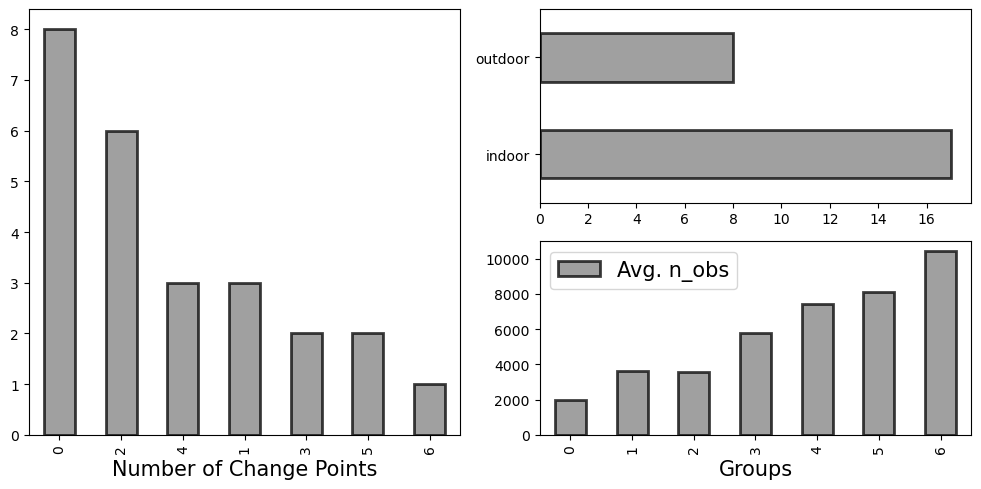

In [ ]:
from matplotlib.pyplot import GridSpec
groups = []
ind_out = []
lengths = []
for id in IDs:
    groups.append(len(df_TS.iloc[id].change_points))
    ind_out.append(df_TS.iloc[id].group)
    lengths.append(df_TS.iloc[id]['x-acc'].shape[0])



fig = plt.figure(figsize=(10,5))

gs = GridSpec(2,2)

ax1 = fig.add_subplot(gs[:, 0])
pd_plot1 = pd.Series(groups).value_counts()
pd_plot1.plot(kind='bar',edgecolor='black',color='grey',alpha=0.75,lw=2,ax=ax1)
ax1.set_xlabel('Number of Change Points',fontsize=15)
ax2 = fig.add_subplot(gs[:1, 1])
pd.Series(ind_out).value_counts().plot(kind='barh',edgecolor='black',color='grey',alpha=0.75,lw=2,ax=ax2)
ax3 = fig.add_subplot(gs[1:,1])

df_plot3 = pd.DataFrame({'groups':groups,'n_obs':lengths}).groupby(['groups']).mean()
df_plot3.columns.values[0] = 'Avg. n_obs'
df_plot3.plot(kind='bar',ax=ax3,legend=False,edgecolor='black',color='grey',alpha=0.75,lw=2)
ax3.legend(fontsize=15)
ax3.set_xlabel('Groups',fontsize=15)
fig.tight_layout()

In [5]:
fig.savefig('HASC_appendix_analysis.pdf')

In [58]:
from claspy.segmentation import BinaryClaSPSegmentation
from claspy.data_loader import load_has_dataset
df_TS_CL = load_has_dataset()

In [93]:
METRICS = {}
METRICS_C_25 = {}
METRICS_C_50 = {}
METRICS_C_150 = {}
METRICS_C_200 = {}

IDs = [10,14,7,182,225,19,185,33,36,87,88,210,11,20,23,243,247,91,95,96,100,141,91,95,245]

for id in IDs:
    print(id)
    METRICS[id]  = {}
    METRICS_C_25[id] = {}
    METRICS_C_50[id] = {}
    METRICS_C_150[id] = {}
    METRICS_C_200[id] = {}

    dataset, window_size, true_cps,labels, time_series = df_TS_CL.iloc[id,:]

    clasp = BinaryClaSPSegmentation(window_size=window_size).fit(time_series)
    f1,AUC_run,fp = f_measure({'0':true_cps},clasp.change_points,100)
    METRICS[id]['F1'] = f1
    METRICS[id]['AUC'] = AUC_run
    METRICS[id]['Covering'] = covering({'0':true_cps},clasp.change_points,time_series.shape[0])
    METRICS[id]['FP'] = fp
    METRICS[id]['DD'] = detection_delay(true_cps,clasp.change_points)[1]

    f1,AUC_run,fp = f_measure({'0':true_cps},clasp.change_points,25)
    METRICS_C_25[id]['F1'] = f1
    METRICS_C_25[id]['AUC'] = AUC_run
    METRICS_C_25[id]['Covering'] = covering({'0':true_cps},clasp.change_points,time_series.shape[0])
    METRICS_C_25[id]['FP'] = fp
    METRICS_C_25[id]['DD'] = detection_delay(true_cps,clasp.change_points)[1]


    f1,AUC_run,fp = f_measure({'0':true_cps},clasp.change_points,50)
    METRICS_C_50[id]['F1'] = f1
    METRICS_C_50[id]['AUC'] = AUC_run
    METRICS_C_50[id]['Covering'] = covering({'0':true_cps},clasp.change_points,time_series.shape[0])
    METRICS_C_50[id]['FP'] = fp
    METRICS_C_50[id]['DD'] = detection_delay(true_cps,clasp.change_points)[1]



    f1,AUC_run,fp = f_measure({'0':true_cps},clasp.change_points,150)
    METRICS_C_150[id]['F1'] = f1
    METRICS_C_150[id]['AUC'] = AUC_run
    METRICS_C_150[id]['Covering'] = covering({'0':true_cps},clasp.change_points,time_series.shape[0])
    METRICS_C_150[id]['FP'] = fp
    METRICS_C_150[id]['DD'] = detection_delay(true_cps,clasp.change_points)[1]


    f1,AUC_run,fp = f_measure({'0':true_cps},clasp.change_points,200)
    METRICS_C_200[id]['F1'] = f1
    METRICS_C_200[id]['AUC'] = AUC_run
    METRICS_C_200[id]['Covering'] = covering({'0':true_cps},clasp.change_points,time_series.shape[0])
    METRICS_C_200[id]['FP'] = fp
    METRICS_C_200[id]['DD'] = detection_delay(true_cps,clasp.change_points)[1]



10
14
7
182
225
19
185
33
36
87
88
210
11
20
23
243
247
91
95
96
100
141


c:\Users\Sven Jacob\miniconda3\envs\torch\Lib\site-packages\claspy\segmentation.py:212: UserWarning: Time series must at least have 2*min_seg_size data points for segmentation. Try setting a smaller window size.
  warnings.warn(


91
95
245


c:\Users\Sven Jacob\miniconda3\envs\torch\Lib\site-packages\claspy\segmentation.py:212: UserWarning: Time series must at least have 2*min_seg_size data points for segmentation. Try setting a smaller window size.
  warnings.warn(


In [36]:
f1_CL,cov_CL, AUC_CL, DD_CL, FP_CL = [],[], [], [],[]
for k,metrics in METRICS.items():
    f1_CL.append(metrics['F1'])
    cov_CL.append(metrics['Covering'])
    AUC_CL.append(metrics['AUC'])
    DD_CL.append(metrics['DD'])
    FP_CL.append(metrics['FP'])

print('F1',np.mean(f1_CL),np.std(f1_CL))
print('Cov',np.mean(cov_CL),np.std(cov_CL))
print('AUC',np.mean(AUC_CL),np.std(AUC_CL))
print('DD',np.mean(DD_CL),np.std(DD_CL),np.min(DD_CL),np.max(DD_CL))
print('FP',np.mean(FP_CL),np.std(FP_CL),np.min(FP_CL),np.max(FP_CL))

F1 0.8042124542124544 0.167022026210334
Cov 0.7881114826696931 0.17667086724406597
AUC 0.8384575569358179 0.14533031504503635
DD 180.53695652173914 290.0899456114319 0.0 1054.6666666666667
FP 0.782608695652174 1.0196555999616153 0 4


In [ ]:
import json
from utilsCPD import *

with open("./R/res/HASC_ECP.json") as f:
    res = json.load(f)

METRICS_ECP = {}

for id, cps_ecp in res.items():
    METRICS_ECP[id]  = {}
    _, _, true_cps,_, time_series = df_TS_CL.iloc[int(id),:]

    f1,AUC_run,fp = f_measure({'0':true_cps},cps_ecp[1:-1],100)
    METRICS_ECP[id]['F1'] = f1
    METRICS_ECP[id]['AUC'] = AUC_run
    METRICS_ECP[id]['Covering'] = covering({'0':true_cps},cps_ecp[1:-1],time_series.shape[0])
    METRICS_ECP[id]['FP'] = fp
    METRICS_ECP[id]['DD'] = detection_delay(true_cps,cps_ecp[1:-1])[1]
   
f1,cov, AUC, DD, FP = [],[], [], [],[]
for k,metrics in METRICS_ECP.items():
    f1.append(metrics['F1'])
    cov.append(metrics['Covering'])
    AUC.append(metrics['AUC'])
    DD.append(metrics['DD'])
    FP.append(metrics['FP'])

print('F1',np.mean(f1),np.std(f1))
print('Cov',np.mean(cov),np.std(cov))
print('AUC',np.mean(AUC),np.std(AUC))
print('DD',np.mean(DD),np.max(DD),np.min(DD))
print('FP',np.mean(FP),np.std(FP),np.max(FP),np.min(FP))

F1 0.6354515050167223 0.17308053116279057
Cov 0.5717929037873651 0.18587539065156664
AUC 0.7340419242593156 0.1150117764742446
DD 357.5037474602692 1264.857142857143 0.0
FP 3.739130434782609 2.3630744768175984 8 0


In [59]:
import json
from utilsCPD import *

with open("./R/res/HASC_BOCPD.json") as f:
    res = json.load(f)

METRICS_BOCPD = {}

for id, cps_bocpd in res.items():
    METRICS_BOCPD[id]  = {}
    _, _, true_cps,_, time_series = df_TS_CL.iloc[int(id),:]
    f1,AUC_run,fp = f_measure({'0':true_cps},cps_bocpd[0],100)
    METRICS_BOCPD[id]['F1'] = f1
    METRICS_BOCPD[id]['AUC'] = AUC_run
    METRICS_BOCPD[id]['Covering'] = covering({'0':true_cps},cps_bocpd[0],time_series.shape[0])
    METRICS_BOCPD[id]['FP'] = fp
    METRICS_BOCPD[id]['DD'] = detection_delay(true_cps,cps_bocpd[0])[1]

   
f1,cov, AUC, DD, FP = [],[], [], [],[]
for k,metrics in METRICS_BOCPD.items():
    f1.append(metrics['F1'])
    cov.append(metrics['Covering'])
    AUC.append(metrics['AUC'])
    DD.append(metrics['DD'])
    FP.append(metrics['FP'])

print('F1',np.mean(f1),np.std(f1))
print('Cov',np.mean(cov),np.std(cov))
print('AUC',np.mean(AUC),np.std(AUC))
print('DD',np.mean(DD),np.max(DD),np.min(DD))
print('FP',np.mean(FP),np.std(FP),np.max(FP),np.min(FP))


F1 0.4201986701788573 0.22649722213348408
Cov 0.6565344410952614 0.24443277353017626
AUC 0.6471897444922078 0.09960024847440418
DD 445.2578348522582 1866.625 0.0
FP 9.043478260869565 10.22136832867288 46 0


#### Result


| METHOD  | DD (min;max) | FP (min;max) |
|-------------|----------|-----------|
| SWD (ours)        | 39 (0;688)  | 0.09 (0;1) |
| ECP         | 357 (0;1264) | 3.8 (0;8)  |
| KCPA         |334 (0;1540) | 14 (0;47) |
| CLasP         | 180 (0;1054) |0.78 (0;4) |
| BOCPD         | 445 (0;1866)  | 9 (0;46) |

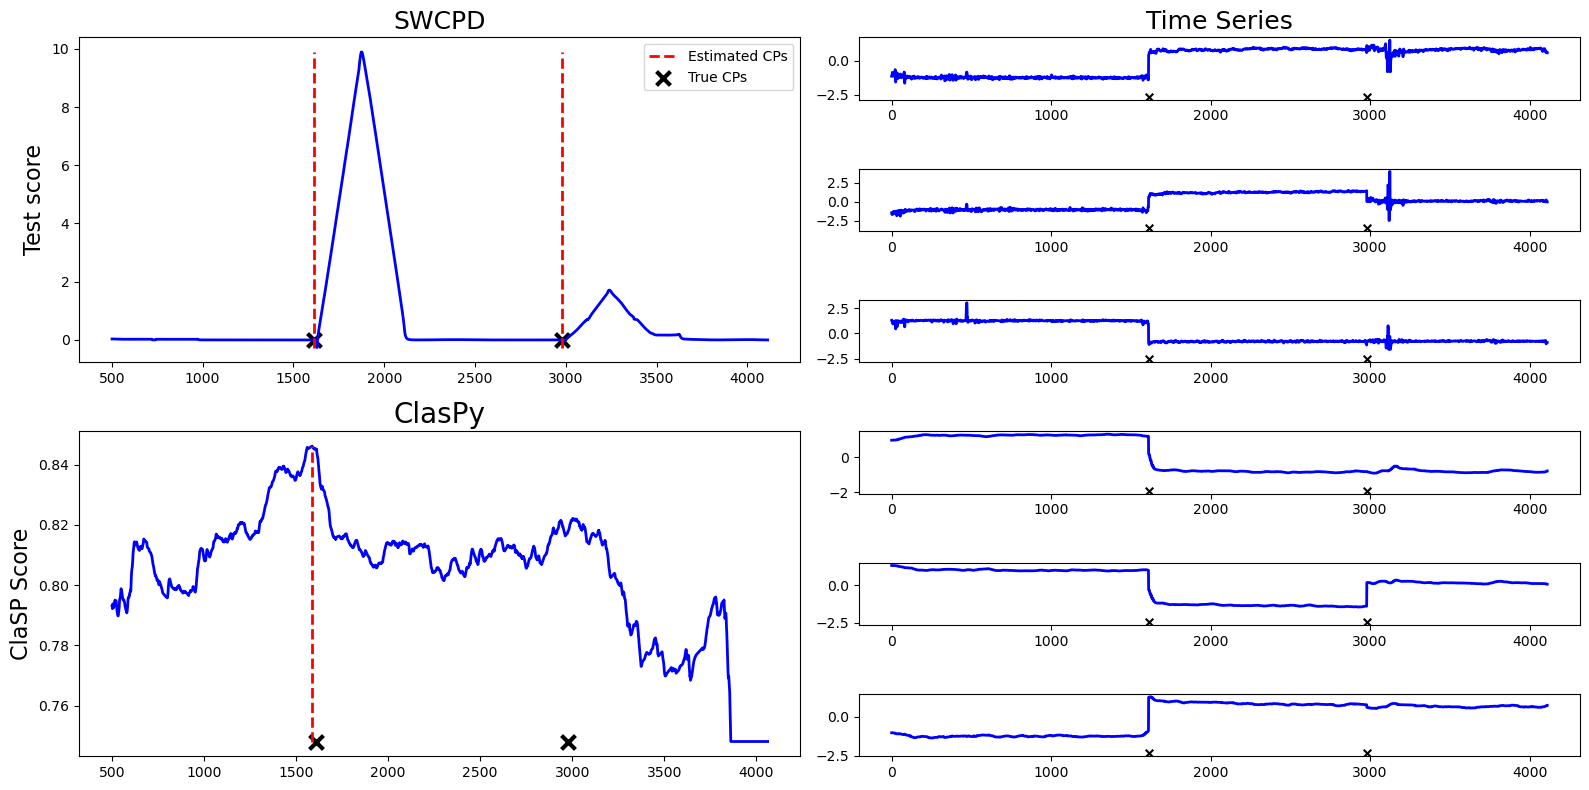

In [209]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np
from matplotlib.ticker import FuncFormatter


fig = plt.figure(figsize=(16, 8))
gs = GridSpec(df.shape[1],2)



ax1 = fig.add_subplot(gs[0:df.shape[1]//2, 0])  # Top half of the first column
ax1.set_title('SWCPD',fontsize=18)
test_stat = np.subtract(detector.upper[:-1],detector.cumsum[1:])
ax1.plot(t,test_stat,alpha=1,lw=2,color='blue')
ax1.vlines(np.array(detector.change_points['loc']),min(test_stat),max(test_stat),color='red',alpha=1.0,lw=2,ls='--',label='Estimated CPs')
ax1.scatter(GroundTruth,np.zeros(len(GroundTruth)),marker='x',color='black',s=100,linewidth=3,label='True CPs')
ax1.set_ylabel('Test score',fontsize=16)
ax1.legend(loc='upper right')

ax2 = fig.add_subplot(gs[df.shape[1]//2:, 0])  # Top half of the first colum
ax2.set_title('ClasPy',fontsize=20)
#ax2.plot(np.arange(clasp.profile.shape[0]),clasp.profile,color='blue',lw=0.75)
ax2.plot(t[:-window_size],clasp.profile[t[:-window_size]],color='blue',lw=2)
ax2.scatter(GroundTruth,np.min(clasp.profile)*np.ones(len(GroundTruth)),marker='x',color='black',s=100,linewidth=3)
ax2.vlines(clasp.change_points,np.min(clasp.profile),np.max(clasp.profile),color='red',lw=2,ls='--')
#ax2.plot(clasp.change_points,np.min(clasp.profile)*np.ones(len(clasp.change_points)),'o',color='red',ms=4)
#ax2.set_xlabel('Time')
ax2.set_ylabel('ClaSP Score',fontsize=16)
ax2.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f"{y:.2f}"))


#### fill out right hand side

for i in range(df.shape[1]):
    ax = fig.add_subplot(gs[i, 1])  
    ax.plot(df.iloc[:,i].values,lw=2,color='blue',alpha=1)
    ax.scatter(GroundTruth,(np.min(df.iloc[:,i]-1))*np.ones(len(GroundTruth)),marker='x',color='black',s=30,alpha=1)
    if i == 0: 
        ax.set_title('Time Series',fontsize=18)

fig.tight_layout()


In [210]:
fig.savefig('HASC_TS_243.pdf')

In [213]:
"HASC_TS_"+str(id)+".csv"

'HASC_TS_243.csv'

In [404]:
for id in IDs:
    df_exp, cps = prepare_data(df_TS,8,id)
    df_exp.to_csv("HASC_TS_"+str(id)+".csv")

In [142]:

def GET_AUCs_BOCPD(tau=100):
    with open("./R/res/HASC_BOCPD.json") as f:
        res = json.load(f)
    METRICS_BOCPD = {}
    for id, cps_bocpd in res.items():
        METRICS_BOCPD[id]  = {}
        _, _, true_cps,_, time_series = df_TS_CL.iloc[int(id),:]
        f1,AUC_run,fp = f_measure({'0':true_cps},cps_bocpd[0],tau)
        METRICS_BOCPD[id]['F1'] = f1
        METRICS_BOCPD[id]['AUC'] = AUC_run
        METRICS_BOCPD[id]['Covering'] = covering({'0':true_cps},cps_bocpd[0],time_series.shape[0])
        METRICS_BOCPD[id]['FP'] = fp
        METRICS_BOCPD[id]['DD'] = detection_delay(true_cps,cps_bocpd[0])[1]
    
    f1,cov,AUC,DD,FP = [],[],[],[],[]
    for k,metrics in METRICS_BOCPD.items():
        if len(metrics)>1:
            f1.append(metrics['F1'])
            cov.append(metrics['Covering'])
            AUC.append(metrics['AUC'])
            DD.append(metrics['DD'])
            FP.append(metrics['FP'])

    return np.mean(AUC),np.mean(FP)
    

def GET_AUCs_ECP(tau=100):
    with open("./R/res/HASC_ECP.json") as f:
        res = json.load(f)

    METRICS_ECP = {}

    for id, cps_ecp in res.items():
        METRICS_ECP[id]  = {}
        _, _, true_cps,_, time_series = df_TS_CL.iloc[int(id),:]

        f1,AUC_run,fp = f_measure({'0':true_cps},cps_ecp[1:-1],tau)
        METRICS_ECP[id]['F1'] = f1
        METRICS_ECP[id]['AUC'] = AUC_run
        METRICS_ECP[id]['Covering'] = covering({'0':true_cps},cps_ecp[1:-1],time_series.shape[0])
        METRICS_ECP[id]['FP'] = fp
        METRICS_ECP[id]['DD'] = detection_delay(true_cps,cps_ecp[1:-1])[1]
    
    f1,cov, AUC, DD, FP = [],[], [], [],[]
    for k,metrics in METRICS_ECP.items():
        f1.append(metrics['F1'])
        cov.append(metrics['Covering'])
        AUC.append(metrics['AUC'])
        DD.append(metrics['DD'])
        FP.append(metrics['FP'])

    return np.mean(AUC),np.mean(FP)


GET_AUCs_ECP(200)


ECPS_M = [GET_AUCs_ECP(t)[0] for t in [25,50,100,150,200]]
BOCPD_M = [GET_AUCs_BOCPD(t)[0] for t in [25,50,100,150,200]]

ECPS_FP = [GET_AUCs_ECP(t)[1] for t in [25,50,100,150,200]]
BOCPD_FP = [GET_AUCs_BOCPD(t)[1] for t in [25,50,100,150,200]]

In [152]:
def AUC_analysis(METRICS_SWD):
    f1,cov,AUC,DD,FP = [],[],[],[],[]
    for k,metrics in METRICS_SWD.items():
        if len(metrics)>1:
            f1.append(metrics['F1'])
            cov.append(metrics['Covering'])
            AUC.append(metrics['AUC'])
            DD.append(metrics['DD'])
            FP.append(metrics['FP'])

    return np.mean(AUC),np.mean(FP)

MEAN ,FPS_SWD= [], []
for res in [METRICS_SWD_25,METRICS_SWD_50,METRICS_SWD,METRICS_SWD_150,METRICS_SWD_200]:
    m,fp =AUC_analysis(res)
    MEAN.append(m)
    FPS_SWD.append(fp)


MEAN_Claps = []
FP_Clasp  =[]
for res in [METRICS_C_25,METRICS_C_50,METRICS,METRICS_C_150,METRICS_C_200]:
    m,fp =AUC_analysis(res)
    MEAN_Claps.append(m)
    FP_Clasp.append(fp)



SWD_df = pd.DataFrame(FPS_SWD,index=[25,50,100,150,200],columns=['SWCPD (ours)'])



In [154]:
FP_Clasp

[1.4782608695652173,
 1.0434782608695652,
 0.782608695652174,
 0.6956521739130435,
 0.6086956521739131]

In [145]:
SWD_df['ClasP'] = FP_Clasp#MEAN_Claps
SWD_df['e-divisive'] = ECPS_FP#ECPS_M
SWD_df['BOCPD'] = BOCPD_FP#BOCPD_M

#copy from KCPA 
# SWD_df['KCP'] = [0.6093832204863007,
#  0.6370112084403755,
#  0.6571305605290371,
#  0.6571305605290371,
#  0.6571305605290371]
SWD_df['KCP'] = [15.782608695652174,
  15.043478260869565,
  13.956521739130435,
  12.565217391304348,
  11.652173913043478]



#copy from OT-CPD
# SWD_df['OT-CPD'] = [np.float64(0.741609231411863),
#  np.float64(0.7543285296574771),
#  np.float64(0.7872232664995823),
#  np.float64(0.7872232664995823),
#  np.float64(0.7872232664995823)]

SWD_df['OT-CPD'] = [np.float64(4.105263157894737),
 np.float64(4.0),
 np.float64(3.736842105263158),
 np.float64(3.736842105263158),
 np.float64(3.5789473684210527)]